In [1]:
import sys
sys.path.append("../")
sys.path.append("modules")
import HVplots
import json
import imp
import os
imp.reload(HVplots)

/tmp/ipykernel_433/2225489084.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'HVplots' from '/home/udzic/HVplots/HVplots.py'>

## 1. Importing data

In [2]:
jsonfile='regular.json'
data=json.load(open(jsonfile))

## 2. Simple plots
the HVplot function plots current and field of the selected file over time (for field the distance is set to .89cm, but can be changed)

the maximum voltage reached in this ramp was 6359.85393258427 V/cm


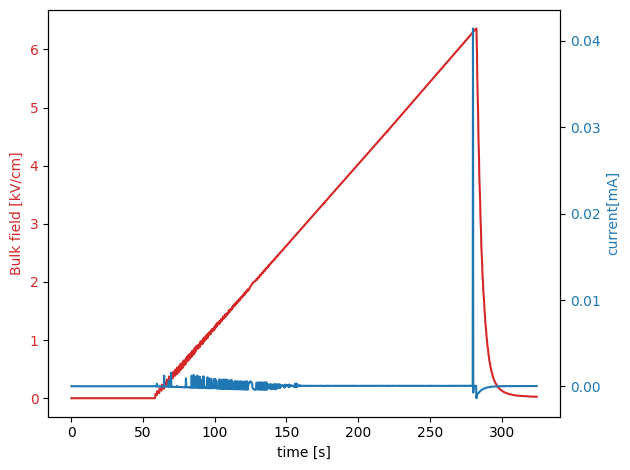

In [3]:
HVplots.HVplot(os.path.join(data['hv_path'],data['datafiles'][0]))

a variation of the plot that also shows the humidity is called VCHplot

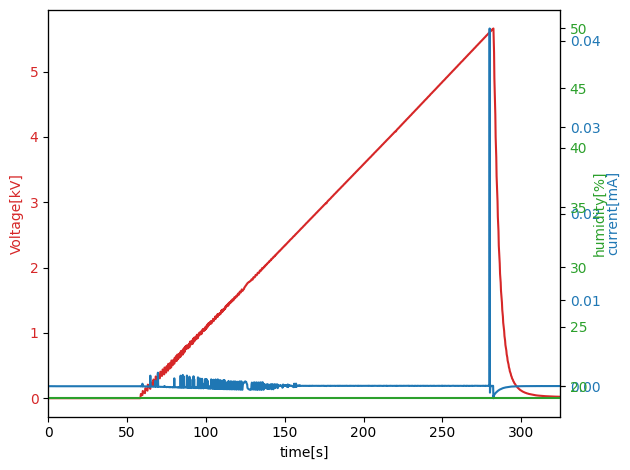

In [4]:
HVplots.VCHplot(os.path.join(data['hv_path'],data['datafiles'][0]),data['humiditydata'])

## 3. Determining breakdown field
This is done by finding significant drops in voltage between to data points ($\Delta t$=.2s). A 500V drop was selecte as the barrier. This is implemented with find_peak, which gives out the index of the voltage drop and the corresponding field (with uncertainty). If no drop occurs, the maximum field is selected. To differentiate, the algorithm gives out a 1 if therre was breakdown and a 0 if not.

In [5]:
for i in data['datafiles']:
    print(HVplots.find_peak(os.path.join(data['hv_path'],i)))

(1412, 6359.85393258427+/-71.4678659053456, 0)
(1264, 6552.831460674158+/-73.63589264256352, 1)
(1360, 7428.471910112359+/-83.47353893889371, 1)
(1458, 7514.786516853932+/-84.44327912693579, 1)
(1489, 7799.471910112359+/-87.6417185709258, 1)


The breakdown locations can be used to create more interesting plots, for example zooming in on the breakdown for the voltage:

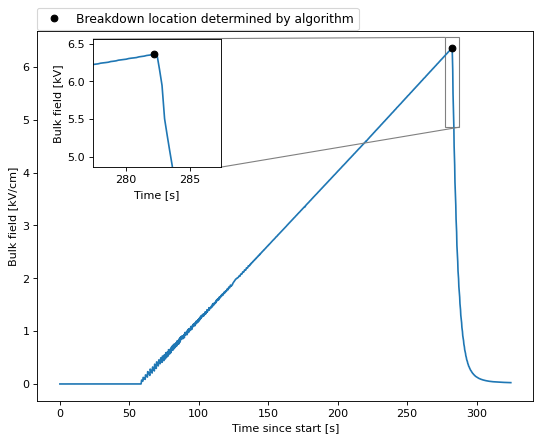

In [6]:
HVplots.zoominplot(os.path.join(data['hv_path'],data['datafiles'][0]))

and current:

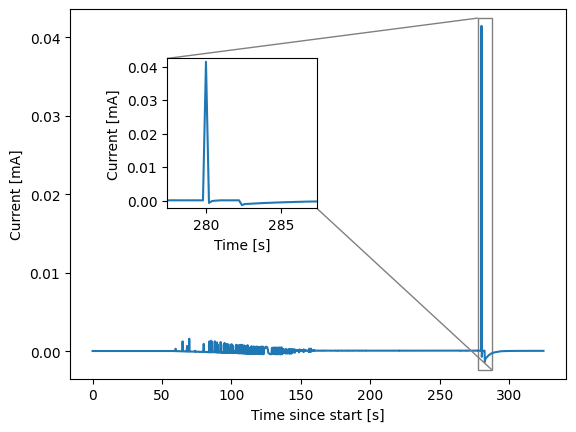

In [7]:
HVplots.zoomincurrentplot(os.path.join(data['hv_path'],data['datafiles'][0]))

You can also plot the breakdown field as a function of the ramp number to see if the breakdown field increases for repeated testing:

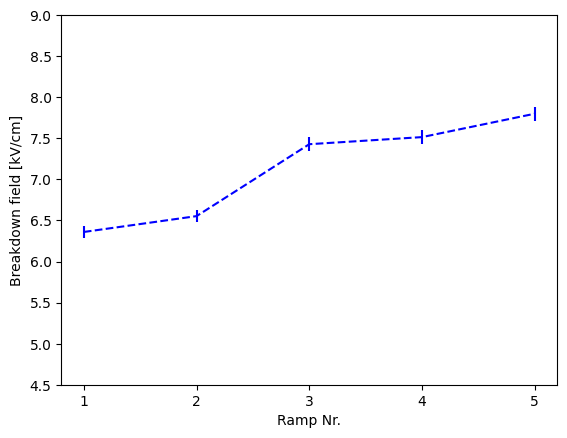

In [8]:
HVplots.conditioning(jsonfile)

As well as the field strengths around the breakdown pointalong with the mean.

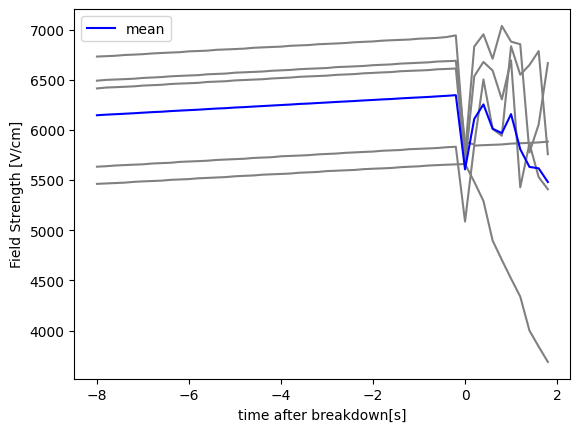

In [9]:
HVplots.breakdown_plot(jsonfile)

## 4. Fowler Nordheim plot
# Theory
According to Fowler Nordheim theory, the current resulting from Electron emission is such that
$$ln(\frac{I}{V^2})\propto \frac{1}{V} \ \ \ .$$
The slope of the straight line when plotting $ln(\frac{I}{V^2})$ over $\frac{1}{V}$, here called $a$, is related to the effective field amplification $\overline{\beta}$ via the equation $\overline{\beta}=\frac{-6.831\cdot 10^9 \Phi^{\frac{3}{2}}d}{a}$. So with the current and voltage data in the csv files, we can make a Fowler Nordheim plot to check if $$$$
-we see Fowler-Nordheim Emission (is the plot a straight line?) and if so $$$$
-what is the field amplification

In most cases, we would only see Fowler Nordheim emissions in a small timeframe of a ramp, so the data that is used for the FN plot is determined with the parameters a and b. a is the number of points before breakdown and b the number of points after breakdown. So the following plot is a FN plot for the 4 seconds before dielectric breakdown.

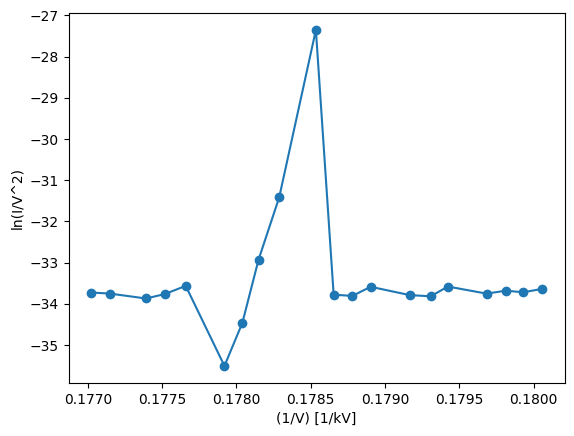

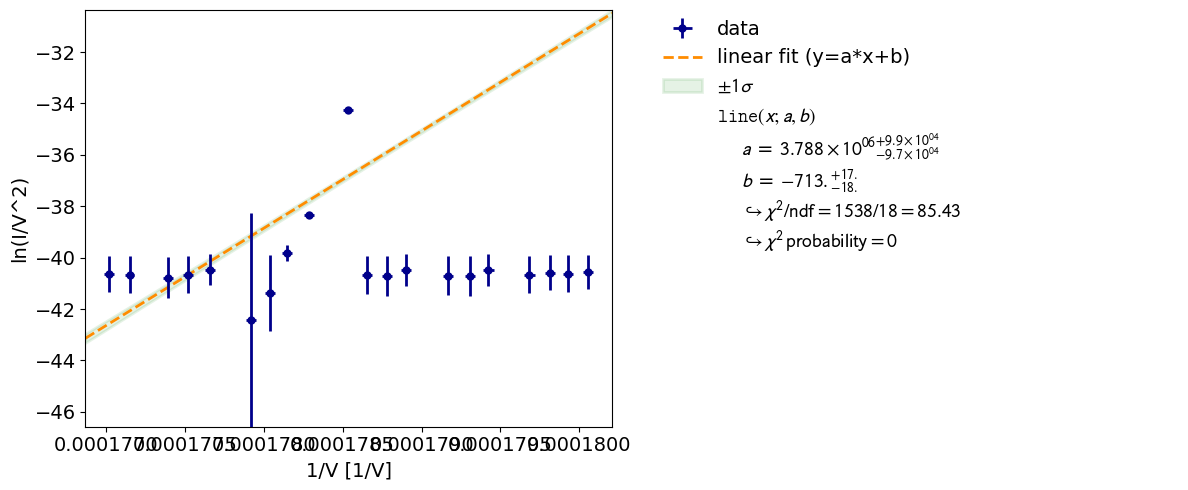

-153+/-4


In [10]:
HVplots.FN(os.path.join(data['hv_path'],data['datafiles'][0]),a=20,b=0)

As we see, the plot does not resemble a straight line, so there is likely no FN emission there.